In [20]:
import pandas as pd
from IPython.display import display, Markdown, Math
from sympy import symbols, Eq, sqrt, Sum, diff, Indexed,IndexedBase, Idx, Sum, Function, solve, solveset, S
from sympy.abc import i
import math
from scipy.stats import lognorm, norm
from scipy.special import factorial
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [21]:
l = 1
mu_s = 3
std_s = .2
t = [1,2,3,4]

def oc_prob(n, l, t):
  return np.exp(-l*t)*((l*t)**n)/factorial(int(n), True)

def F(N, mu_s, std_s):
  F_s = lambda s, mu, std : norm.cdf(s, loc = mu, scale=std)
  def F_n(s,t,l, oc_prob=oc_prob):
    return sum([oc_prob(n, l, t) * (F_s(s, n*mu_s, np.sqrt(n)*std_s) if n > 0 else 1) for n in N])
  return F_n

In [22]:
df = pd.DataFrame([], index=pd.MultiIndex.from_tuples([(t, i) for t,i in itertools.product(t,range(12))]), columns=['1'])#, columns=[('t', None), ('n',None)], dtype='int')


df.index.names = ['t', 'n']
df['Occurence Probability'] = df.apply(lambda r: oc_prob(r.name[1], l, r.name[0]), axis=1)

F_columns = np.arange(0.0, 36.0+.3,0.3)
for s in F_columns:
  df[s]= df.apply(lambda r: F([r.name[1]], mu_s, std_s)(s, r.name[0], l), axis=1)
  df = df.copy()
df
display_cols =[.3,.6,3.3,6.6,36]

df.columns.names = ['F(s)']
# df = df.set_index([('t', None), ('n',None)] )
display(df.loc[[1], ['Occurence Probability']+display_cols])


sum_df = df[F_columns].groupby('t').sum()
display(sum_df.loc[[1], display_cols])

F(s)  Occurence Probability            0.3            0.6            3.3  \
t n                                                                        
1 0            3.678794e-01   3.678794e-01   3.678794e-01   3.678794e-01   
  1            3.678794e-01   2.876378e-42   6.535312e-34   3.433024e-01   
  2            1.839397e-01   2.351092e-91   2.712590e-82   1.240460e-22   
  3            6.131324e-02  1.052513e-140  2.091522e-131   2.387674e-62   
  4            1.532831e-02  3.441407e-190  8.978008e-181  5.294381e-107   
  5            3.065662e-03  8.984512e-240  2.760003e-230  1.103322e-153   
  6            5.109437e-04  1.961118e-289  6.718177e-280  2.077989e-201   
  7            7.299195e-05   0.000000e+00   0.000000e+00  9.438580e-250   
  8            9.123994e-06   0.000000e+00   0.000000e+00  1.699943e-298   
  9            1.013777e-06   0.000000e+00   0.000000e+00   0.000000e+00   
  10           1.013777e-07   0.000000e+00   0.000000e+00   0.000000e+00   
  11           9.216156e-09   0.000000e+00   0.000000e+00   0.000000e+00   

F(s)            6.6          36.0  
t n                                
1 0    3.678794e-01  3.678794e-01  
  1    3.678794e-01  3.678794e-01  
  2    1.808224e-01  1.839397e-01  
  3    1.306644e-13  6.131324e-02  
  4    1.198491e-43  1.532831e-02  
  5    1.595516e-81  3.065662e-03  
  6   2.272242e-123  5.109437e-04  
  7   1.643519e-167  7.299195e-05  
  8   4.209492e-213  9.123994e-06  
  9   1.129245e-259  1.013777e-06  
  10  6.102276e-307  1.013777e-07  
  11   0.000000e+00  9.216127e-09

F(s),0.3,0.6,3.3,6.6,36.0
t,,,,,
1,0.367879,0.367879,0.711182,0.916581,1.0


<Axes: xlabel='Severity ($1000)', ylabel='CDF of the accumulated loss'>

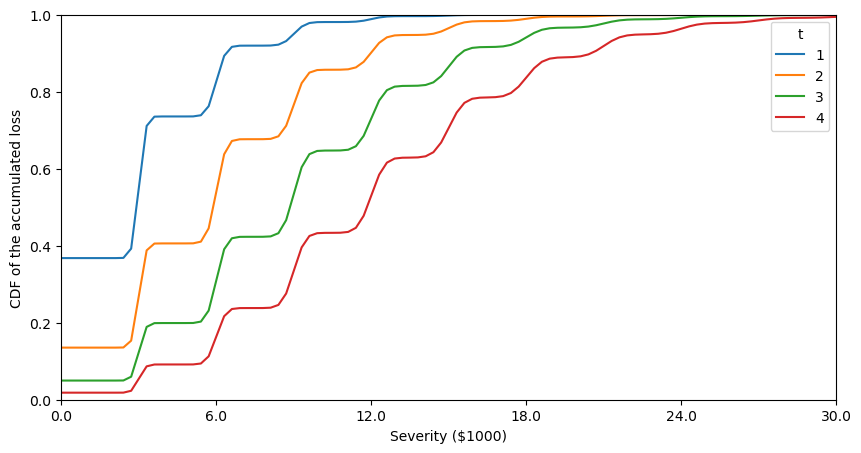

In [23]:
sum_df.T.plot(kind='line', xlim=(0,100), ylim=(0,1), figsize=(10,5), xlabel='Severity ($1000)', ylabel='CDF of the accumulated loss', )